In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from sigpyproc.readers import FilReader
from scipy.fft import fft
%matplotlib inline

In [112]:
#Load the converted fil file
filfile_path=Path('filterbanks/1655547760_1655551362_beam_1134_016ms.fil')
#Path('/home/kevin/kevinlukechime/SLOWTRANSIENT/TESTING/clustering/filterbanks/spliced_blc4041424344454647_guppi_59103_01372_PSR_B2021+51_0009.rawspec.0002.fil')
fil_file=FilReader(filfile_path.as_posix())
fil_file.header

Header(filename='filterbanks/1655547760_1655551362_beam_1134_016ms.fil', data_type='filterbank', nchans=1024, foff=-0.390625, fch1=800.0, nbits=32, tsamp=0.01572864, tstart=59748.4324109309, nsamples=229056, nifs=1, coord=<SkyCoord (ICRS): (ra, dec) in deg
    (310.05312042, 51.95397822)>, azimuth=<Angle 0. deg>, zenith=<Angle 0. deg>, telescope='CHIME', backend='CHIME', source='Stationary Beam', frame='topocentric', ibeam=1134, nbeams=1, dm=0, period=0, accel=0, signed=False, rawdatafile='', hdrlens=[330], datalens=[938213376], filenames=['filterbanks/1655547760_1655551362_beam_1134_016ms.fil'], nsamples_files=[229056], tstart_files=[59748.4324109309])

Output()

Shape of folded data (20, 128, 100)
Shape of watefall (128, 100)


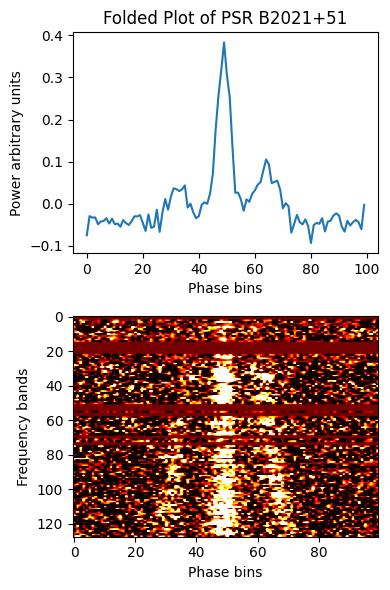

In [122]:
data=fil_file
freq=1.89 #Hz FROM ATNF
DM=22.54 #FROM ATNF
bins=100 
ints=20
bands=128

#Fold the data
folded=data.fold(period=1/freq,dm=DM,accel=0 , 
                 nbins=bins, nints=ints,
                 nbands=bands)

print('Shape of folded data',folded.shape)
#Get the waterfall
waterfall=folded.get_freq_phase()
#Get the profile 
profile=folded.get_profile()
print('Shape of watefall',waterfall.shape)

plt.figure(figsize=(4,6))

plt.subplot(2,1,1)
plt.title('Folded Plot of PSR B2021+51')
plt.xlabel('Phase bins')
plt.ylabel('Power arbitrary units')
plt.plot(profile[:])

plt.subplot(2,1,2)
plt.xlabel('Phase bins')
plt.ylabel('Frequency bands')
plt.imshow(waterfall[:,:], aspect='auto', cmap='hot', 
           vmax=max(np.nanmedian(waterfall, axis=0)), 
           vmin=min(np.nanmedian(waterfall, axis=0)))

plt.tight_layout()